#### Problem Statement: 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file present in the repository.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    Which variables are significant in predicting the price of a house, and
    How well those variables describe the price of a house.
    Also, determine the optimal value of lambda for ridge and lasso regression.

##### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# import the important packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [482]:
import warnings
warnings.filterwarnings('ignore')

In [483]:
# increasing the maximum number of rows and columns displayable to 150
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [484]:
#Reading the data file#  
house = pd.read_csv("train.csv", na_values="NAN")

In [485]:
#checking the header#
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1. Understanding Data and Exploration

In [486]:
# shape of the dataset
house.shape

(1460, 81)

- The dataset contains 1460 rows and 81 columns

In [487]:
# information about the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [488]:
# looking at the statistical information
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### EDA for  some of the variables

##### Univariate Analysis

###### 1. Sale Price

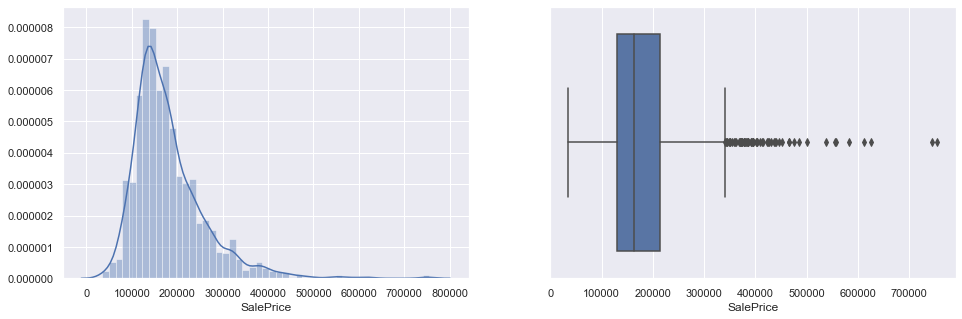

In [489]:
plt.figure(figsize=(16, 5))
plt.subplot(1,2,1)
sns.distplot(house['SalePrice'])

plt.subplot(1,2,2)
sns.boxplot(house['SalePrice'])
plt.show()

In [490]:
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- The SalePrice is highly right skewed. It has very high values for some houses.

##### 2. Numerical Variable

In [491]:
numeric_feature=['LotArea','MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch']

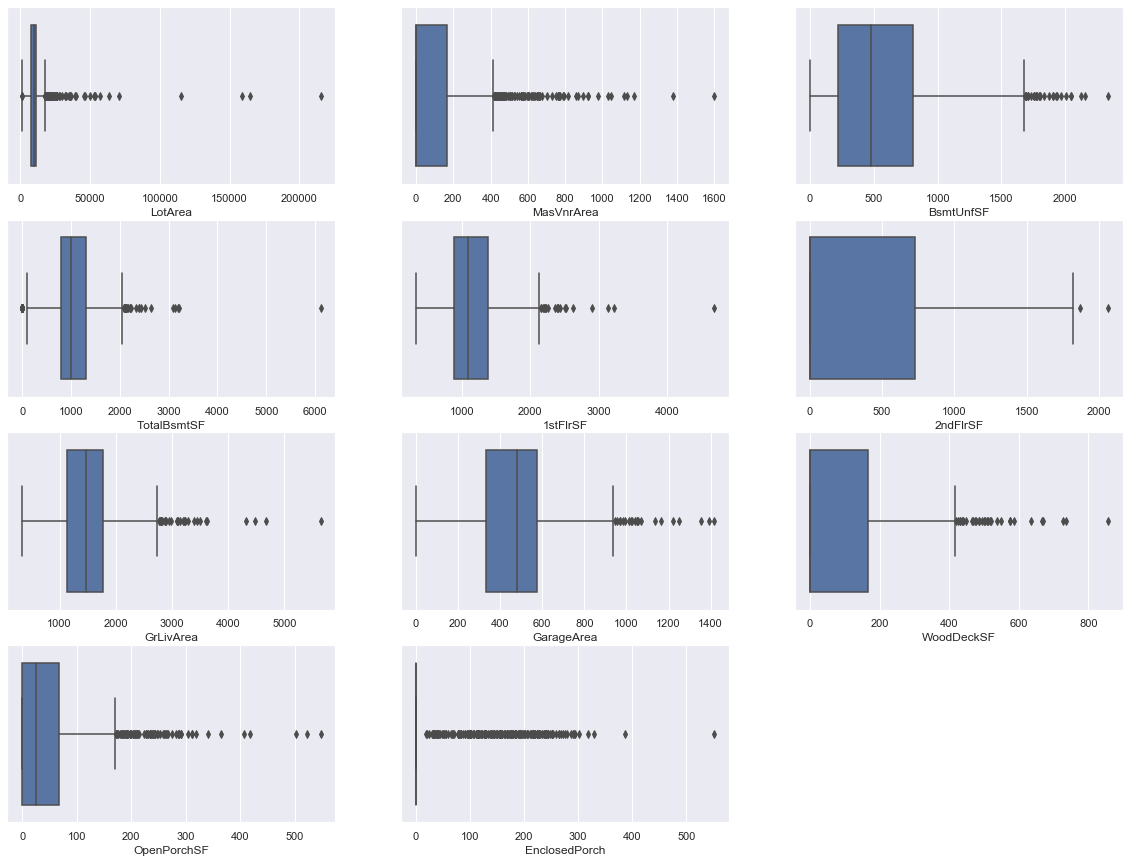

In [492]:
plt.figure(figsize = (20, 15))
for i in enumerate(numeric_feature):
    plt.subplot(4,3,i[0]+1)
    sns.boxplot(house[i[1]])

- Almost all the continuos numerical variable are having outliers

##### 3. Categorical Variables

In [493]:
categorical_feature=['SaleCondition', 'SaleType', 'GarageQual', 'GarageCond', 'GarageType',
       'KitchenQual', 'CentralAir', 'BsmtQual', 'BsmtCond','LandContour','Utilities','Neighborhood']

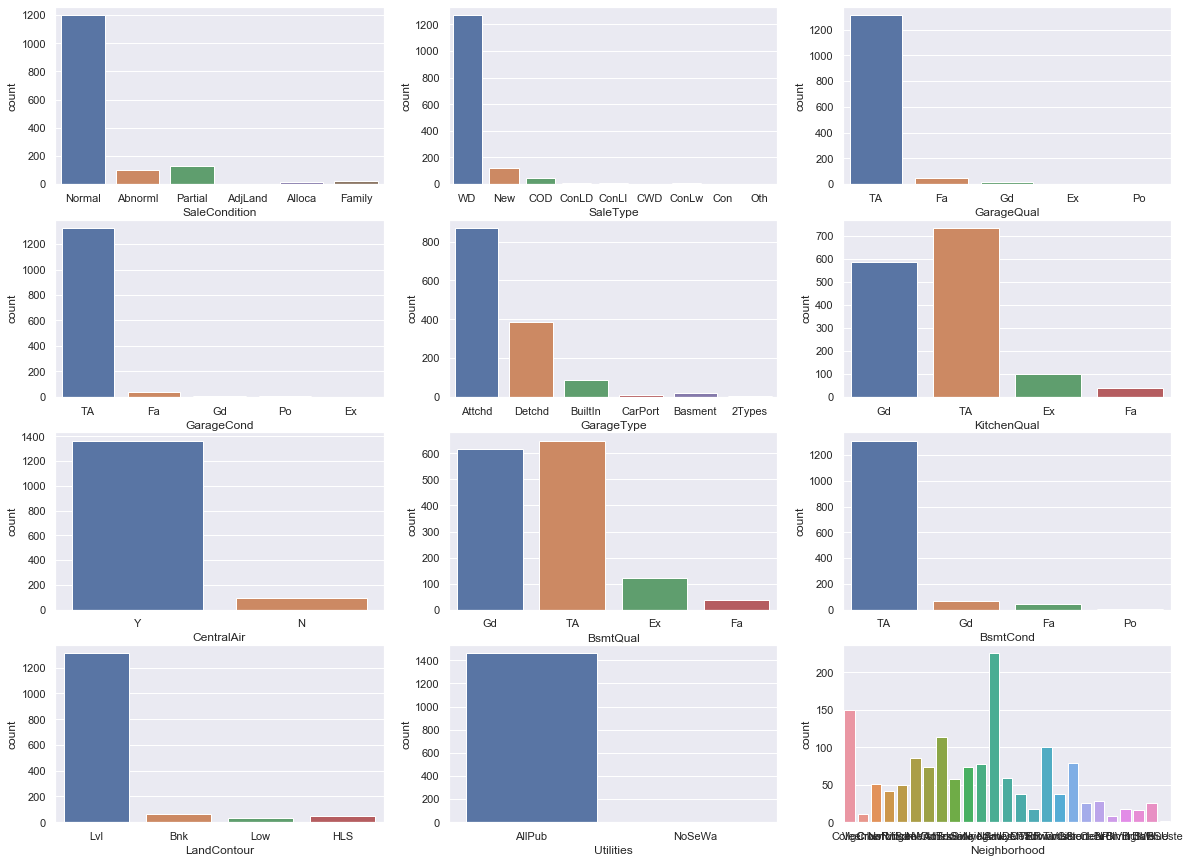

In [494]:
plt.figure(figsize = (20, 15))
for i in enumerate(categorical_feature):
    plt.subplot(4,3,i[0]+1)
    sns.countplot(house[i[1]])

##### Bivariate Analysis

##### 1. Overall Quality vs Sale Price

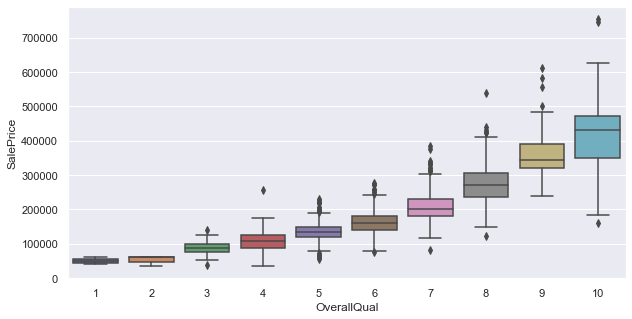

In [495]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='OverallQual', y='SalePrice', data=house)
plt.show()

- There is clear correlation between OverallQual and SalePrice. The SalePrice increases as the OverallQual inceases. 

##### 2. Overall Condition vs Sale Price

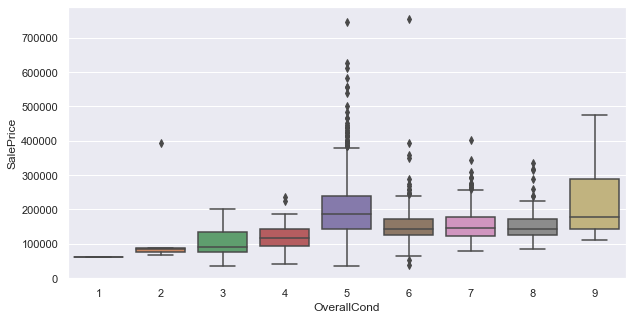

In [496]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='OverallCond', y='SalePrice', data=house)
plt.show()

- There is relation between Overall Condition and Sale Price but it is not very linear. The Sale Price increases lineraly till 5 (Average), after that the Price falls and becomes more or less steady till 8 (Very Good) and again increases for 9 (Excellenet). Also, the houses with Overall Condition from 5 - 8 have highest variance in Sale Price. 

##### 3. Neighborhood vs Sale Price

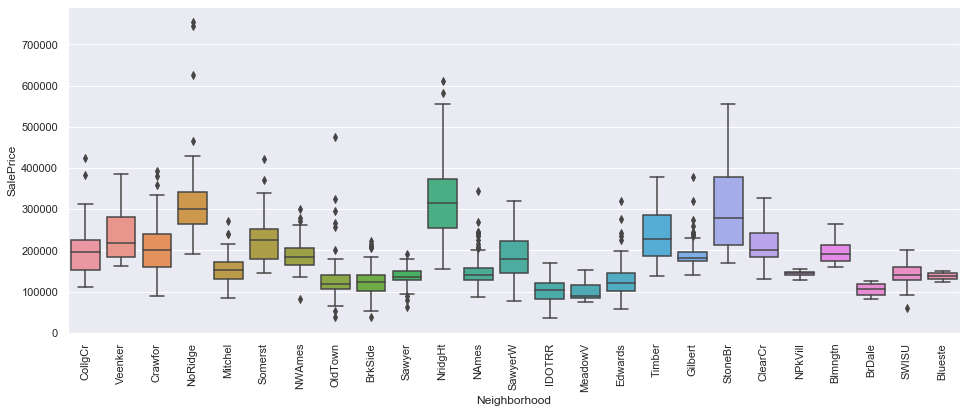

In [497]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=house)
plt.xticks(rotation=90)
plt.show()

- The Sale Price changes depending on the Neighborhood.

##### 5.Heating & Heating Quality

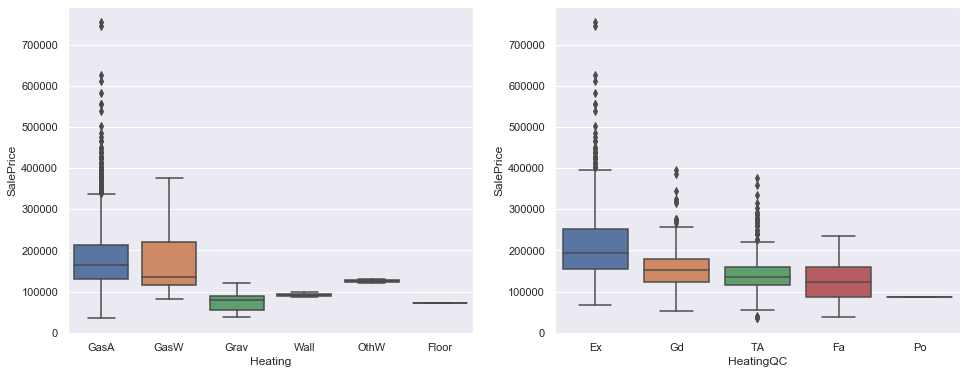

In [498]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='Heating', y='SalePrice', data=house)

plt.subplot(1,2,2)
sns.boxplot(x='HeatingQC', y='SalePrice', data=house)
plt.show()

- There is strong linear relationship between Heating Qaulity and Sale Price. As Heating Qaulity becomes better, the Sale Price increases. 
- The Sale Prices dependes on Type of Heating. The Gas forced warm air furnace has highest Median Sale Price, while Floor has the lowest Sale Price.  

##### 6. Kitchen Quality & Fireplace Quality

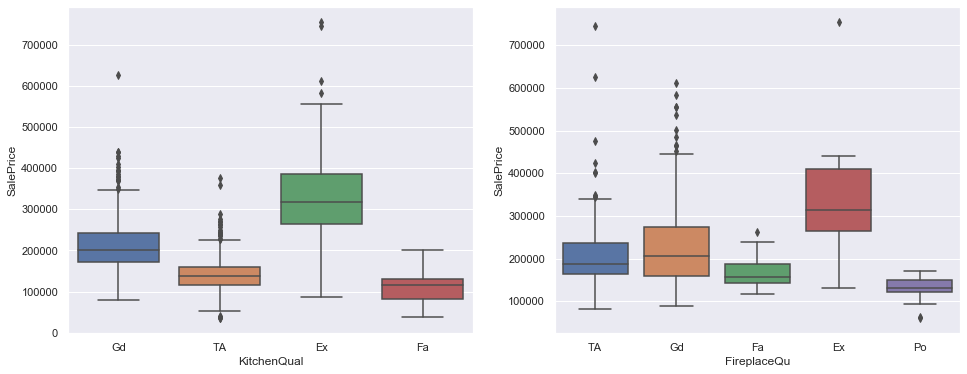

In [499]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='KitchenQual', y='SalePrice', data=house)

plt.subplot(1,2,2)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=house)
plt.show()

- Both Kitchen Quality and Fireplace Quality have strong linear relationship with Sale Price. The better the quality, the more is the Sale Price.  

##### 7. Central Air & Electrical 

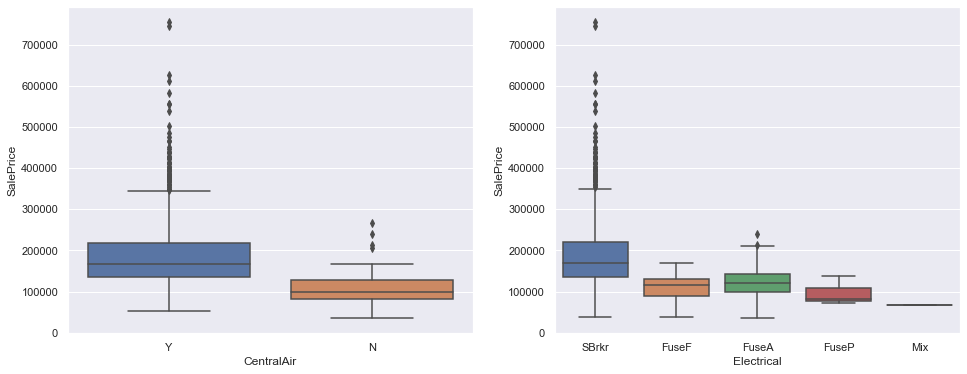

In [500]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='CentralAir', y='SalePrice', data=house)

plt.subplot(1,2,2)
sns.boxplot(x='Electrical', y='SalePrice', data=house)
plt.show()

- Houses with Central AC has higher Sale Price than houses not having Central AC.  
- The Sale Prices dependes on Electrical System. The Standard Circuit Breakers & Romex (SBrkr) has highest Median Sale Price, while Mixed has the lowest Sale Price.  

##### 8. Garage quality and Garage Condition

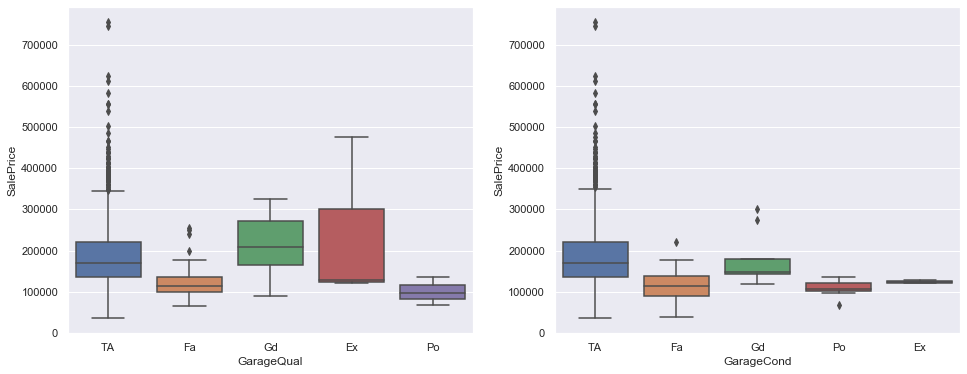

In [501]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='GarageQual', y='SalePrice', data=house)

plt.subplot(1,2,2)
sns.boxplot(x='GarageCond', y='SalePrice', data=house)
plt.show()

- Sale Price changes for different Garage Quality and Garage Condition, but they do not have a linear relationship with Sale Price. 

##### 8. Garage quality and Garage Condition

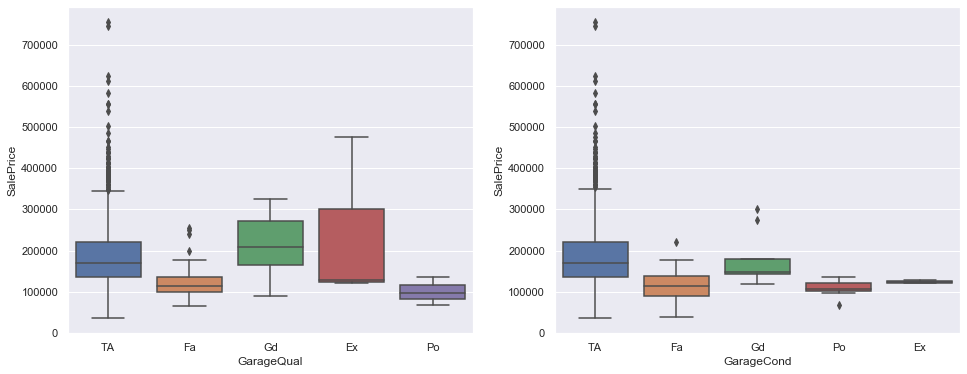

In [502]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='GarageQual', y='SalePrice', data=house)

plt.subplot(1,2,2)
sns.boxplot(x='GarageCond', y='SalePrice', data=house)
plt.show()

- Sale Price changes for different Garage Quality and Garage Condition, but they do not have a linear relationship with Sale Price. 

##### 9. Pool quality and Fence quality

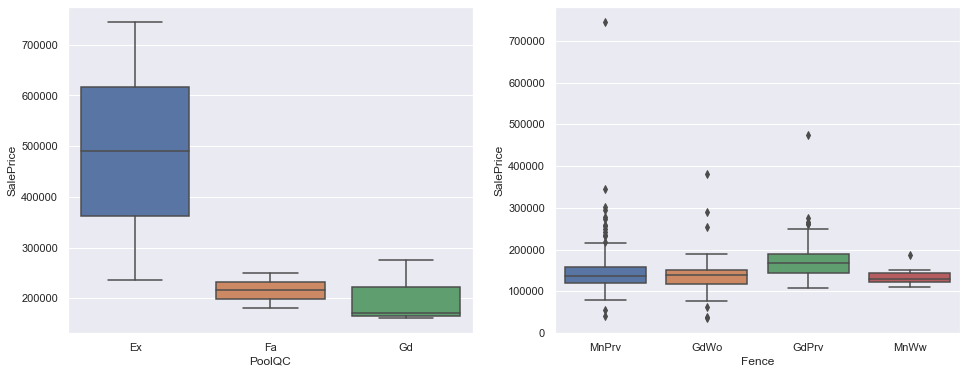

In [503]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='PoolQC', y='SalePrice', data=house)

plt.subplot(1,2,2)
sns.boxplot(x='Fence', y='SalePrice', data=house)
plt.show()

- The Sale Price has a relationship with Pool Quality. It is highest for Excellent Pool quality.
- The Sale Price also has a relationship with Fence Quality. It is highest for Good Privacy and lowest for Minimum wood/wire.

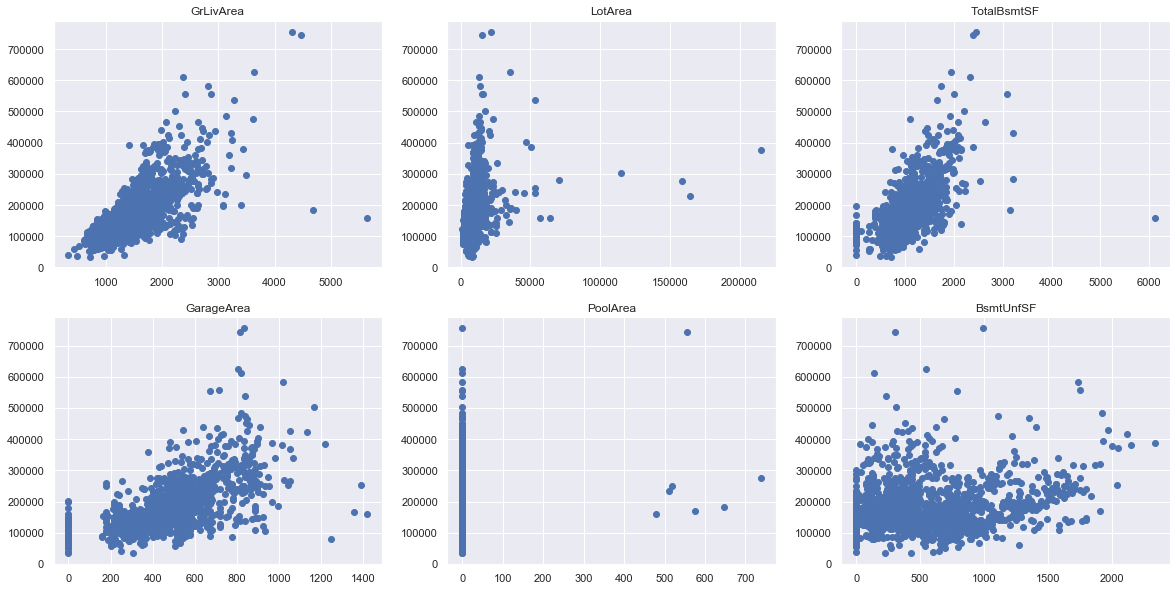

In [504]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('GrLivArea')
plt.scatter(house['GrLivArea'], house['SalePrice'])

plt.subplot(2,3,2)
plt.title('LotArea')
plt.scatter(house['LotArea'], house['SalePrice'])

plt.subplot(2,3,3)
plt.title('TotalBsmtSF')
plt.scatter(house['TotalBsmtSF'], house['SalePrice'])

plt.subplot(2,3,4)
plt.title('GarageArea')
plt.scatter(house['GarageArea'], house['SalePrice'])

plt.subplot(2,3,5)
plt.title('PoolArea')
plt.scatter(house['PoolArea'], house['SalePrice'])

plt.subplot(2,3,6)
plt.title('BsmtUnfSF')
plt.scatter(house['BsmtUnfSF'], house['SalePrice'])

plt.show()

- The GrLivArea has a strong linear relationship with Sale Price. 
- TotalBsmtSF also ssem to have a linear ralationship with Sale Price but there are some values on Sale Price concentrated on 0 TotalBsmtSF 
- The rest does not seem to have a linear relationship with the Sale Price. 

##### Multivariate Analysis

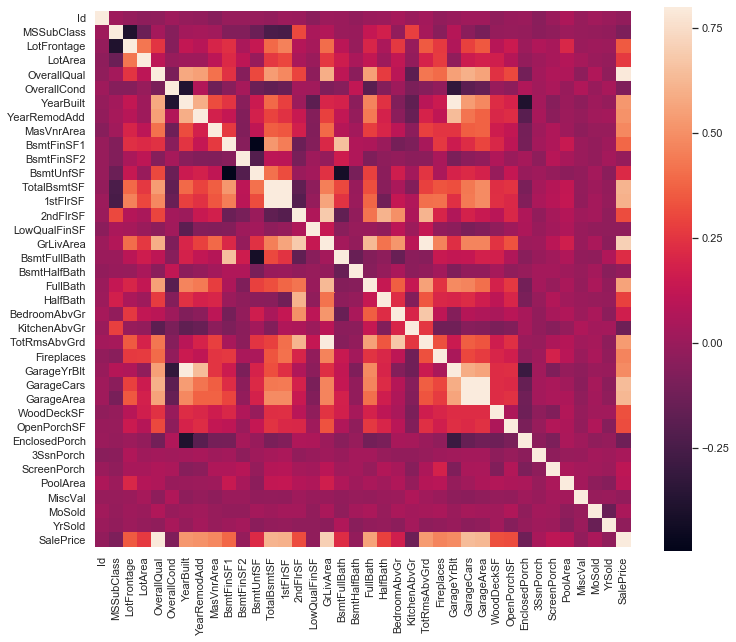

In [505]:
#correlation matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 10))
a = sns.heatmap(corrmat, vmax=.8, square=True)
bottom, top = a.get_ylim()
a.set_ylim(bottom+0.5, top-0.5)
plt.show()

- The Correlation matrix is very large and it is very hard to visualize the most correlated fields with Sale Price. So, lets find out top 10 most correlated fields with Sale Price

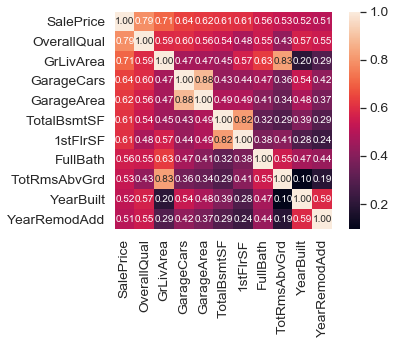

In [506]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom+0.5, top-0.5)
plt.show()

- These are the most correlated fiels with Sale Price

##### Pair Plot of Sale Price with some other features

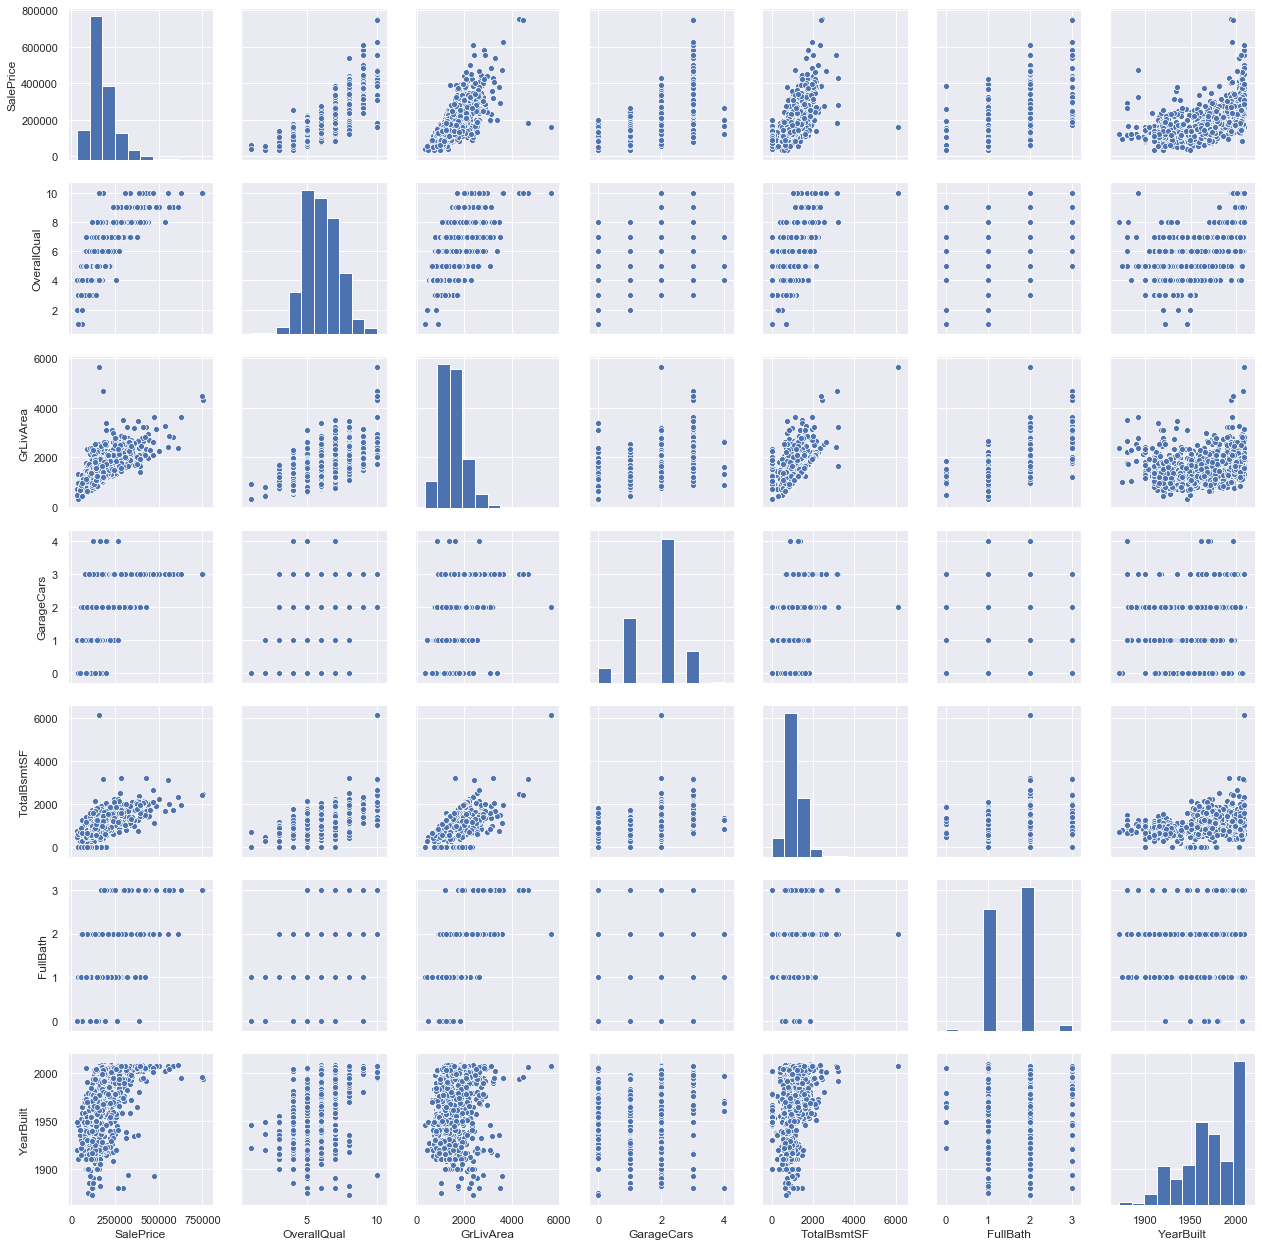

In [507]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show();

#### Null Value Treatement

In [508]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- There are missing values in lot of columns. But some of the columns do not actually have missing values, it indicates of something meaningful like 'Not Present' or 'None'. 
- First, we have to impute those with appropriate value. We are replacing here with 'None'

In [509]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature","MasVnrType"]

In [510]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)

In [511]:
# Remaining missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000


- Feature LotFrontage has a lot of missing value and it is a nemerical variable. So, its better to drop it. 
- Dropping LotFrontage

In [512]:
house.drop("LotFrontage", axis=1, inplace=True)

In [513]:
#Rechecking missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000


- The fields GarageYrBlt and MasVnrArea can be imputed with Median. So, imputing them.

In [514]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)

- There is only 1 missing value in Electrical. So, it can be dropped

In [515]:
house.dropna(inplace=True)

In [516]:
# Checking Missing Values
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


- There are no more missing values in the data. 

In [517]:
# Rechecking the info
print(house.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-

##### Data Transformation

The year columns are itself not that useful. But if we convert them into age or number of years, then they will be mush more useful in determining cost of house. So, converting them into number of years. 

In [518]:
#converting year to number of years (age) by subtracting from current year - 2020
house['AgeFromBuilt'] = 2020 - house['YearBuilt']
house['RemodAgeFromDate'] = 2020 - house['YearRemodAdd'] 
house['GarageBltAge'] = 2020 - house['GarageYrBlt']
house['SoldAgeFromDate'] = 2020 - house['YrSold']

- Dropping the Year fields

In [519]:
house.drop(["YearBuilt","YearRemodAdd","GarageYrBlt","YrSold"], axis=1, inplace=True)

In [520]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate
0,1,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,WD,Normal,208500,17,17,17.0,12
1,2,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,WD,Normal,181500,44,44,44.0,13
2,3,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,WD,Normal,223500,19,18,19.0,12
3,4,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,WD,Abnorml,140000,105,50,22.0,14
4,5,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,WD,Normal,250000,20,20,20.0,12


###### Data Type Transformation

- Some columns are Categorical but they have data type as numeric (int). So, converting them to object to treat them as categorical

In [521]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [522]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
Id                  1459 non-null int64
MSSubClass          1459 non-null object
MSZoning            1459 non-null object
LotArea             1459 non-null int64
Street              1459 non-null object
Alley               1459 non-null object
LotShape            1459 non-null object
LandContour         1459 non-null object
Utilities           1459 non-null object
LotConfig           1459 non-null object
LandSlope           1459 non-null object
Neighborhood        1459 non-null object
Condition1          1459 non-null object
Condition2          1459 non-null object
BldgType            1459 non-null object
HouseStyle          1459 non-null object
OverallQual         1459 non-null object
OverallCond         1459 non-null object
RoofStyle           1459 non-null object
RoofMatl            1459 non-null object
Exterior1st         1459 non-null object
Exterior2nd         1459 non-null 

In [523]:
# shape of the dataset
house.shape

(1459, 80)

### Filtering out numerical and categorical Columns ###

In [524]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [525]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     55
int64      23
float64     2
Name: 0, dtype: int64

In [526]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [527]:
print(numerical_values_train)

['Id', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'AgeFromBuilt', 'RemodAgeFromDate', 'GarageBltAge', 'SoldAgeFromDate']


In [528]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


- Finding the imbalance in the Categorical Variable

In [529]:
for i in enumerate(categorical_values_train):
    print  (100*(house[i[1]].value_counts(normalize=True)))

20     36.737491
60     20.493489
50      9.869774
120     5.962988
30      4.729267
160     4.318026
70      4.112406
80      3.906785
90      3.564085
190     2.056203
85      1.370802
75      1.096642
45      0.822481
180     0.685401
40      0.274160
Name: MSSubClass, dtype: float64
RL         78.821110
RM         14.941741
FV          4.455106
RH          1.096642
C (all)     0.685401
Name: MSZoning, dtype: float64
Pave    99.588759
Grvl     0.411241
Name: Street, dtype: float64
None    93.762851
Grvl     3.427005
Pave     2.810144
Name: Alley, dtype: float64
Reg    63.331049
IR1    33.173406
IR2     2.810144
IR3     0.685401
Name: LotShape, dtype: float64
Lvl    89.787526
Bnk     4.318026
HLS     3.427005
Low     2.467443
Name: LandContour, dtype: float64
AllPub    99.93146
NoSeWa     0.06854
Name: Utilities, dtype: float64
Inside     72.035641
Corner     18.026045
CulDSac     6.442769
FR2         3.221385
FR3         0.274160
Name: LotConfig, dtype: float64
Gtl    94.653873
Mod 

- There are some variable too much imbalance. I am taking 90% as cuf-off and dropping the columns with too much imbalance as the model will not be able to learn anything from it. 
- Column Names: Street, Alley, LandContour, Utilities, LandSlope, Condition2, RoofMatl, Heating, CentralAir, Electrical, BsmtHalfBath, KitchenAbvGr, Functional, GarageQual, GarageCond, PavedDrive, PoolQC, MiscFeature and SaleType

In [530]:
house.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType'], axis=1, inplace=True)

In [531]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 61 columns):
Id                  1459 non-null int64
MSSubClass          1459 non-null object
MSZoning            1459 non-null object
LotArea             1459 non-null int64
LotShape            1459 non-null object
LotConfig           1459 non-null object
Neighborhood        1459 non-null object
Condition1          1459 non-null object
BldgType            1459 non-null object
HouseStyle          1459 non-null object
OverallQual         1459 non-null object
OverallCond         1459 non-null object
RoofStyle           1459 non-null object
Exterior1st         1459 non-null object
Exterior2nd         1459 non-null object
MasVnrType          1459 non-null object
MasVnrArea          1459 non-null float64
ExterQual           1459 non-null object
ExterCond           1459 non-null object
Foundation          1459 non-null object
BsmtQual            1459 non-null object
BsmtCond            1459 non-null

### Data Preparation

#### Target Variable: Sale Price Treatement

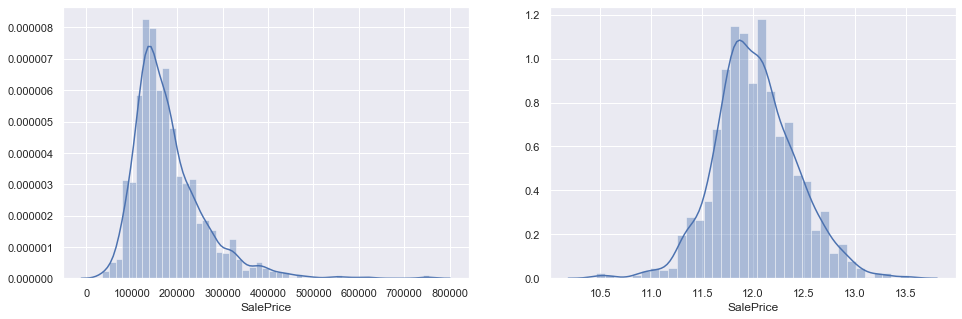

In [532]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(house["SalePrice"])

plt.subplot(1,2,2)
sns.distplot(np.log(house["SalePrice"]))

plt.show()

- After the Log Transformation the Sale Price looks mush better now. Its close to normal distribution. 
- So, transforming the target variable to Log Transformation

In [533]:
house["TransformedPrice"] = np.log(house["SalePrice"])

- Dropping the original Sale Price column as we shall be using the TransformedPrice column as Target variable now

In [534]:
house.drop('SalePrice',axis=1)

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,TransformedPrice
0,1,60,RL,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,0,0,None,0,2,Normal,17,17,17.0,12,12.247694
1,2,20,RL,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,None,0,5,Normal,44,44,44.0,13,12.109011
2,3,60,RL,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,None,0,9,Normal,19,18,19.0,12,12.317167
3,4,70,RL,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,None,0,2,Abnorml,105,50,22.0,14,11.849398
4,5,60,RL,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,None,0,12,Normal,20,20,20.0,12,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,Ex,953,694,0,1647,0,2,1,3,TA,7,1,TA,Attchd,RFn,2,460,0,40,0,0,0,0,None,0,8,Normal,21,20,21.0,13,12.072541
1456,1457,20,RL,13175,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,6,Gable,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,TA,2073,0,0,2073,1,2,0,3,TA,7,2,TA,Attchd,Unf,2,500,349,0,0,0,0,0,MnPrv,0,2,Normal,42,32,42.0,10,12.254863
1457,1458,70,RL,9042,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,9,Gable,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,Ex,1188,1152,0,2340,0,2,0,4,Gd,9,2,Gd,Attchd,RFn,1,252,0,60,0,0,0,0,GdPrv,2500,5,Normal,79,14,79.0,10,12.493130
1458,1459,20,RL,9717,Reg,Inside,NAmes,Norm,1Fam,1Story,5,6,Hip,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gd,1078,0,0,1078,1,1,0,2,Gd,5,0,None,Attchd,Unf,1,240,366,0,112,0,0,0,None,0,4,Normal,70,24,70.0,10,11.864462


In [535]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,TransformedPrice
0,1,60,RL,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,0,0,None,0,2,Normal,208500,17,17,17.0,12,12.247694
1,2,20,RL,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,None,0,5,Normal,181500,44,44,44.0,13,12.109011
2,3,60,RL,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,None,0,9,Normal,223500,19,18,19.0,12,12.317167
3,4,70,RL,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,None,0,2,Abnorml,140000,105,50,22.0,14,11.849398
4,5,60,RL,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,None,0,12,Normal,250000,20,20,20.0,12,12.429216


##### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [536]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object]
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'Fence', 'SaleCondition']


In [537]:
print(len(categorical_values_train))

36


In [538]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(house[categorical_values_train], drop_first=True)

# Adding the results to the master dataframe
house = pd.concat([house, dummy1], axis=1)

In [539]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,TransformedPrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,RL,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,None,Attchd,RFn,2,548,0,61,0,0,0,0,None,0,2,Normal,208500,17,17,17.0,12,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,2,20,RL,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,0,0,0,None,0,5,Normal,181500,44,44,44.0,13,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,3,60,RL,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,0,0,0,None,0,9,Normal,223500,19,18,19.0,12,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,4,70,RL,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,0,0,0,None,0,2,Abnorml,140000,105,50,22.0,14,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,5,60,RL,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,0,0,0,None,0,12,Normal,250000,20,20,20.0,12,12.429216,0,0,0,0,1,0

- Dropping the repeated variables

In [540]:
house=house.drop(categorical_values_train,axis=1)

In [541]:
house.head()

,Id,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,TransformedPrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2,208500,17,17,17.0,12,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,2,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,5,181500,44,44,44.0,13,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,3,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,9,223500,19,18,19.0,12,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,4,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,2,140000,105,50,22.0,14,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,5,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,12,250000,20,20,20.0,12,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1

##### Train-Test Split

In [542]:
X = house.drop(["Id", "TransformedPrice"], axis=1)
y = house["TransformedPrice"]

In [543]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

##### Feature Scaling

In [544]:
X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,10125,0.0,0,0,0,0,1302,432,0,1734,539,0,0,0,0,0,0,0,8,126000,43,43,43.0,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1416,11340,0.0,0,0,777,777,1246,1044,0,2290,560,0,0,114,0,0,0,0,4,122500,135,70,49.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
390,8405,0.0,241,391,229,861,961,406,0,1367,384,0,130,112,0,0,0,0,4,119000,120,70,42.0,12,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
877,8834,216.0,1170,0,292,1462,1462,762,0,2224,738,184,0,0,0,0,0,0,6,350000,16,15,16.0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
567,10171,168.0,2,0,1515,1517,1535,0,0,1535,532,0,0,0,0,0,0,0,3,214000,16,16,16.0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,

In [545]:
# scaling the numerical variables
scaler = StandardScaler()

X_train[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'AgeFromBuilt', 'RemodAgeFromDate', 'GarageBltAge', 'SoldAgeFromDate']] = scaler.fit_transform(X_train[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'AgeFromBuilt', 'RemodAgeFromDate', 'GarageBltAge', 'SoldAgeFromDate']])

X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,-0.049244,-0.555867,-0.931228,-0.299629,-1.265589,-2.274081,0.320038,0.206085,-0.123208,0.399579,0.302095,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.633710,126000,-0.195445,0.352223,0.058581,-0.890540,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1416,0.067048,-0.555867,-0.931228,-0.299629,0.464070,-0.607802,0.179679,1.610886,-0.123208,1.449374,0.399400,-0.729730,-0.702191,1.435413,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,122500,2.818107,1.638960,0.306419,-1.638888,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
390,-0.213872,-0.555867,-0.422211,1.997881,-0.755819,-0.427663,-0.534650,0.146404,-0.123208,-0.293361,-0.416110,-0.729730,1.144341,1.403785,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,119000,2.326767,1.638960,0.017275,-0.142193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
877,-0.172811,0.591698,1.539931,-0.299629,-0.615576,0.861183,0.721065,0.963575,-0.123208,1.324758,1.224177,0.708584,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.098625,350000,-1.079857,-0.982172,-1.056689,-0.890540,0,0

#### Model Building

##### RFE

In [546]:
# Running RFE with the output number of the variable equal to 50

#lm = LinearRegression()
#lm.fit(X_train, y_train)

# running RFE
#rfe = RFE(lm, 50)            
#rfe = rfe.fit(X_train, y_train)

In [547]:
#rfe.support_

In [548]:
#list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [549]:
#col = X_train.columns[rfe.support_]
#col

In [550]:
#X_train.columns[~rfe.support_]

In [551]:
#X_train_rfe=X_train[col]

#X_train_rfe

In [552]:
# Associate the new 50 columns to X_train and X_test for further analysis

#X_train = X_train_rfe[X_train_rfe.columns]

In [553]:
print(len(X_train.columns))

245


In [554]:
X_test

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,12205,157.0,568,0,264,832,976,1111,0,2087,444,133,168,0,0,0,0,0,7,187500,54,13,54.0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
425,3378,0.0,0,0,651,651,707,682,0,1389,240,0,0,126,0,0,0,0,9,135000,74,28,73.0,11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0
204,3500,0.0,312,0,408,720,720,564,0,1284,240,0,35,0,0,0,0,0,4,110000,73,70,72.0,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
118,12376,0.0,1470,0,203,1673,1699,1523,0,3222,594,367,0,0,0,0,0,0,5,320000,30,30,30.0,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
244,8880,0.0,695,0,253,948,1222,888,0,2110,463,0,130,0,0,0,0,0,5,205000,26,18,26.0,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,

#### Model Building & Evaluation

##### Ridge

In [555]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [556]:
# Results of Ridge Regression
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008378,0.000487,0.001199,0.000403,0.0001,{'alpha': 0.0001},-0.052568,-0.055265,-0.058009,-0.057483,-0.058795,-0.056420,0.002259,26,-0.037613,-0.036180,-0.035764,-0.036768,-0.034694,-0.036204,0.000977
1,0.006583,0.001620,0.001395,0.000489,0.001,{'alpha': 0.001},-0.052551,-0.055206,-0.057988,-0.057458,-0.058768,-0.056391,0.002260,25,-0.037613,-0.036176,-0.035764,-0.036767,-0.034696,-0.036203,0.000977
2,0.005984,0.000892,0.001396,0.000488,0.01,{'alpha': 0.01},-0.052397,-0.054708,-0.057790,-0.057241,-0.058519,-0.056127,0.002267,24,-0.037621,-0.036137,-0.035766,-0.036762,-0.034712,-0.036200,0.000974
3,0.004787,0.000399,0.001197,0.000399,0.1,{'alpha': 0.1},-0.051648,-0.052116,-0.056553,-0.055958,-0.056832,-0.054618,0.002260,22,-0.037748,-0.036173,-0.035930,-0.036945,-0.034884,-0.036336,0.000966
4,0.005585,0.001196,0.001396,0.000489,0.2,{'alpha': 0.2},-0.051156,-0.050693,-0.055845,-0.055026,-0.055707,-0.053683,0.002276,21,-0.037918,-0.036284,-0.036134,-0.037153,-0.035080,-0.036514,0.000963


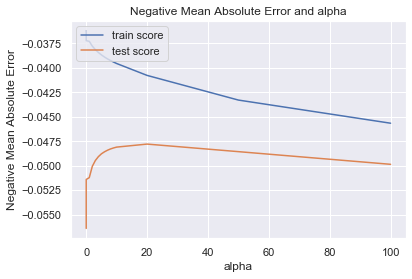

In [557]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [558]:
# get the best estimator for alpha

ridge_model_cv.best_estimator_

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

- The best estimator is coming as alpha = 20 for Ridge

In [559]:
# check the coefficient values with alpha = 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.92252950e-03, -1.34607284e-02,  2.59034877e-03,  3.69012426e-03,
        2.39420973e-03,  6.28331555e-03,  7.47819477e-03,  1.26882743e-02,
        5.16403105e-03,  1.65324582e-02,  1.99088333e-02,  6.97906214e-03,
        8.37377243e-04,  4.20821521e-03,  3.48693972e-04,  4.54712850e-03,
       -1.82650891e-02,  3.26084355e-04,  1.74481838e-03,  3.69136351e-06,
       -2.25574022e-02, -1.83763643e-02,  3.70224679e-03,  5.33954300e-03,
       -4.64306343e-02, -5.26271908e-03, -2.31678575e-03,  3.93117881e-03,
       -2.28057255e-02,  2.24559953e-02,  2.24773227e-02, -6.27483441e-04,
        8.31793029e-03,  1.19856768e-02,  1.36994668e-02, -2.34045407e-02,
       -7.92309904e-03,  3.82331811e-04,  2.74651222e-02,  1.68565256e-02,
        3.26229241e-02,  6.36820391e-03,  6.70583031e-03, -5.05930279e-03,
        2.52092261e-04,  5.65905067e-03, -3.09033564e-03, -4.61144479e-04,
       -5.29844281e-03, -1.11152639e-04, -8.98332117e-03,  1.59467596e-02,
        2.64739865e-02,  

- Let us see the R2 score for Test and Train data

In [560]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9739249528169004


- Scaling the X_test numerical variables

In [561]:
X_test[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'AgeFromBuilt', 'RemodAgeFromDate', 'GarageBltAge', 'SoldAgeFromDate']] = scaler.transform(X_test[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'AgeFromBuilt', 'RemodAgeFromDate', 'GarageBltAge', 'SoldAgeFromDate']])

X_train.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,-0.049244,-0.555867,-0.931228,-0.299629,-1.265589,-2.274081,0.320038,0.206085,-0.123208,0.399579,0.302095,-0.729730,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.633710,126000,-0.195445,0.352223,0.058581,-0.890540,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1416,0.067048,-0.555867,-0.931228,-0.299629,0.464070,-0.607802,0.179679,1.610886,-0.123208,1.449374,0.399400,-0.729730,-0.702191,1.435413,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,122500,2.818107,1.638960,0.306419,-1.638888,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
390,-0.213872,-0.555867,-0.422211,1.997881,-0.755819,-0.427663,-0.534650,0.146404,-0.123208,-0.293361,-0.416110,-0.729730,1.144341,1.403785,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,119000,2.326767,1.638960,0.017275,-0.142193,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0
877,-0.172811,0.591698,1.539931,-0.299629,-0.615576,0.861183,0.721065,0.963575,-0.123208,1.324758,1.224177,0.708584,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.098625,350000,-1.079857,-0.982172,-1.056689,-0.890540,0,0

In [562]:
#X_test =  X_test[X_train.columns]
X_test.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeFromBuilt,RemodAgeFromDate,GarageBltAge,SoldAgeFromDate,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,0.149840,0.278243,0.268446,-0.299629,-0.677906,-0.489854,-0.497053,1.764679,-0.123208,1.066085,-0.138095,0.309921,1.684096,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,0.267543,187500,0.164871,-1.077486,0.512951,0.606154,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
425,-0.695025,-0.555867,-0.931228,-0.299629,0.183585,-0.878009,-1.171279,0.779941,-0.123208,-0.251823,-1.083345,-0.729730,-0.702191,1.625176,-0.121132,-0.273,-0.054189,-0.077724,0.999878,135000,0.819991,-0.362632,1.297770,-0.890540,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0
204,-0.683348,-0.555867,-0.272252,-0.299629,-0.357351,-0.730038,-1.138696,0.509081,-0.123208,-0.450075,-1.083345,-0.729730,-0.205048,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.830960,110000,0.787235,1.638960,1.256464,-0.890540,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
118,0.166207,-0.555867,2.173561,-0.299629,-0.813696,1.313673,1.315085,2.710395,-0.123208,3.209102,0.556942,2.139081,-0.702191,-0.367337,-0.121132,-0.273,-0.054189,-0.077724,-0.464793,320000,-0.621273,-0.267318,-0.478400,-1.638888,0

In [563]:
# R2 score for Test data predicted
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9439194895562414


- Mean Squared Error for Train and Test

In [564]:
# Mean Squared Error for train data
mean_squared_error(y_train, ridge.predict(X_train))

0.0042598880917169065

In [565]:
# Mean Squared Error for test data
mean_squared_error(y_test, ridge.predict(X_test))

0.008440650253046793

###### Find the top 10 most significant variables from the Model for predicting Sale Price

In [566]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0029
1,MasVnrArea,-0.0135
2,BsmtFinSF1,0.0026
3,BsmtFinSF2,0.0037
4,BsmtUnfSF,0.0024
...,...,...
240,SaleCondition_AdjLand,0.0002
241,SaleCondition_Alloca,0.0007
242,SaleCondition_Family,0.0073
243,SaleCondition_Normal,0.0188


In [567]:
# Finding the absolute value of coefficients
ridge_df['absvalue'] = abs(ridge_df['Coefficient'])
ridge_df.head()

,Features,Coefficient,absvalue
0,LotArea,0.0029,0.0029
1,MasVnrArea,-0.0135,0.0135
2,BsmtFinSF1,0.0026,0.0026
3,BsmtFinSF2,0.0037,0.0037
4,BsmtUnfSF,0.0024,0.0024


In [568]:
# Top 10 most significant variables
ridge_df.sort_values(by=['Coefficient'], ascending=False, inplace=True)
ridge_df.head(n=10)

,Features,Coefficient,absvalue
97,OverallQual_7,0.0348,0.0348
98,OverallQual_8,0.0343,0.0343
40,MSZoning_RL,0.0326,0.0326
54,Neighborhood_Crawfor,0.0304,0.0304
190,FullBath_2,0.0288,0.0288
106,OverallCond_7,0.0286,0.0286
38,MSZoning_FV,0.0275,0.0275
162,BsmtCond_Gd,0.0275,0.0275
52,Neighborhood_ClearCr,0.0265,0.0265
96,OverallQual_6,0.0251,0.0251


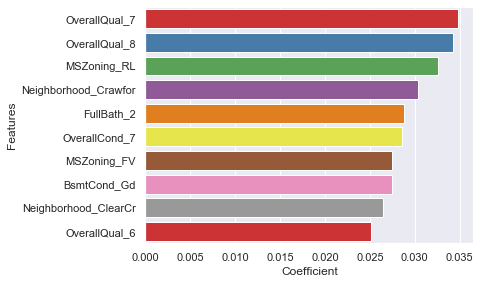

In [569]:
# bar plot to determine the variables that would affect pricing most using ridge regression
temp1_df = ridge_df.head(n=10)
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()

- The graph displays top 10 variable based on Ridge Regression

### LASSO

In [570]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [571]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
2,0.0003,-0.039506,-0.048691,1
4,0.0005,-0.040867,-0.048707,2
3,0.0004,-0.040211,-0.048723,3
1,0.0002,-0.038644,-0.049181,4
0,0.0001,-0.037638,-0.050082,5
5,0.001,-0.044211,-0.050084,6
6,0.002,-0.049154,-0.054067,7
7,0.003,-0.052551,-0.056348,8
8,0.004,-0.054689,-0.057503,9
9,0.005,-0.056363,-0.058384,10


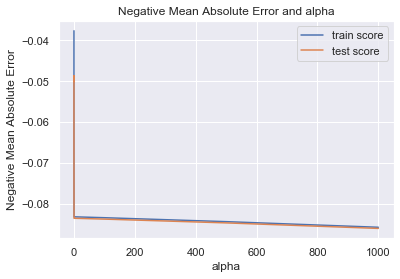

In [572]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [573]:
# get the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

- The best estimator comes out to be 0.0003 for Lasso 

In [574]:
# check the coefficient values with alpha = 0.0003

alpha = 0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.11278737e-03, -9.36255917e-03,  0.00000000e+00,  1.55951356e-03,
       -0.00000000e+00,  9.77159835e-03,  0.00000000e+00,  6.17451939e-03,
        3.90619876e-03,  2.55071341e-02,  2.33619345e-02,  7.78392707e-03,
        1.01615343e-03,  3.42675026e-03, -0.00000000e+00,  3.43336385e-03,
       -1.65483886e-02, -0.00000000e+00,  1.92862855e-03,  3.68629387e-06,
       -2.37871475e-02, -1.65066144e-02,  3.66641530e-03,  4.99464666e-03,
       -6.35943273e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.73446696e-02,  1.71212847e-02,  3.50058376e-02, -0.00000000e+00,
        0.00000000e+00,  8.20690268e-03,  6.93545284e-03, -3.50443868e-02,
       -0.00000000e+00, -0.00000000e+00,  8.90487941e-02,  6.18497217e-02,
        7.60739187e-02,  5.16765365e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.07361077e-03,  0.00000000e+00,  0.00000000e+00,
       -4.81798520e-03,  0.00000000e+00, -0.00000000e+00,  1.44561581e-02,
        3.68107159e-02, -

- Find the R squared value for both Test and Train data

In [575]:
#lets predict the R-squared value of train data
y_train_pred_lasso = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))

0.9759380211812853


In [576]:
#lets predict the R-squared value of test data
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9455770560540969


- Mean Squared Error for Train and Test data

In [577]:
# MSE for Train data
mean_squared_error(y_train, lasso.predict(X_train))

0.003931012523705916

In [578]:
# MSE for Test data
mean_squared_error(y_test, lasso.predict(X_test))

0.008191170728540725

###### Find the top 10 most significant variables for Lasso

In [579]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0021
1,MasVnrArea,-0.0094
2,BsmtFinSF2,0.0016
3,TotalBsmtSF,0.0098
4,2ndFlrSF,0.0062
5,LowQualFinSF,0.0039
6,GrLivArea,0.0255
7,GarageArea,0.0234
8,WoodDeckSF,0.0078
9,OpenPorchSF,0.0010


In [580]:
# Calculating absolute value of coefficient
lasso_df['absvalue'] = abs(lasso_df['Coefficient'])
lasso_df.head()

,Features,Coefficient,absvalue
0,LotArea,0.0021,0.0021
1,MasVnrArea,-0.0094,0.0094
2,BsmtFinSF2,0.0016,0.0016
3,TotalBsmtSF,0.0098,0.0098
4,2ndFlrSF,0.0062,0.0062


In [581]:
# Finding top 10 most significant variables for LASSO
lasso_df.sort_values(by=['Coefficient'], ascending=False, inplace=True)
lasso_df.head(n=10)

,Features,Coefficient,absvalue
25,MSZoning_FV,0.0890,0.0890
27,MSZoning_RL,0.0761,0.0761
26,MSZoning_RH,0.0618,0.0618
28,MSZoning_RM,0.0517,0.0517
54,OverallQual_7,0.0438,0.0438
55,OverallQual_8,0.0423,0.0423
80,BsmtCond_Gd,0.0378,0.0378
33,Neighborhood_Crawfor,0.0373,0.0373
32,Neighborhood_ClearCr,0.0368,0.0368
95,FullBath_2,0.0353,0.0353


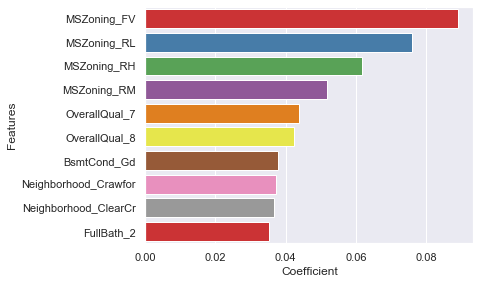

In [582]:
# bar plot to determine the variables that would affect pricing most using ridge regression
temp2_df = lasso_df.head(n=10)
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()

#### Conclusion: 
- The optimal lambda value in case of Ridge and Lasso is as below:

    - Ridge - 20
    - Lasso - 0.0003
- The Mean Squared error in case of Ridge and Lasso are:

    - Ridge - 0.008440
    - Lasso - 0.008191
- The R-squared score for Ridge and Lasso are: 

    - Ridge - 0.9439
    - Lasso - 0.9455

- The Mean Squared Error of Lasso is slightly lower than that of Ridge and also the R-squared score in Lasso is slightly better

- Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.

- Hence based on Lasso, the factors that generally affect the price are MSZoning_FV, MSZoning_RL, MSZoning_RH, MSZoning_RM, OverallQual_7, OverallQual_8, BsmtCond_Gd, Neighborhood_Crawfor, Neighborhood_ClearCr and FullBath_2

- Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house

#### Subjective Question 1

##### LASSO

- The best value of alpha is 0.0003 for Lasso, lets check with double i.e. 0.0006

In [583]:
# check the coefficient values with alpha = 0.0003

lasso_2 = Lasso()
alpha = 0.0006

lasso_2 = Lasso(alpha=alpha)
        
lasso_2.fit(X_train, y_train) 
lasso_2.coef_

array([ 2.30505158e-03, -1.05170534e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.37894579e-02,  0.00000000e+00,  1.69178945e-03,
        3.93723318e-03,  2.15431359e-02,  2.05619864e-02,  7.28510990e-03,
        5.42889355e-04,  3.42756835e-03, -0.00000000e+00,  3.60364963e-03,
       -1.70773213e-02,  0.00000000e+00,  1.98475664e-03,  3.77144360e-06,
       -1.72520853e-02, -1.85431308e-02,  5.58210360e-03,  4.79925041e-03,
       -7.26781382e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -9.38174747e-03,  1.22643084e-02,  2.97569467e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.30149928e-03, -1.60619324e-02,
       -0.00000000e+00, -0.00000000e+00,  2.48422278e-02,  0.00000000e+00,
        2.51904728e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.12525430e-03,  0.00000000e+00,  0.00000000e+00,
       -3.84069974e-03,  0.00000000e+00, -0.00000000e+00,  1.52912940e-03,
        1.43027390e-02, -

In [584]:
#lets predict the R-squared value of train data
y_train_pred_lasso2 = lasso_2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso2))

0.9718487727494793


In [585]:
#lets predict the R-squared value of test data
y_test_pred_lasso2 = lasso_2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso2))

0.9449789565246034


- Mean Squared Error for Train and Test data

In [586]:
# MSE for Train data
mean_squared_error(y_train, lasso_2.predict(X_train))

0.0045990742371287375

In [587]:
# MSE for Test data
mean_squared_error(y_test, lasso_2.predict(X_test))

0.008281190396782321

###### Find the top 10 most significant variables for Lasso

In [588]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso2_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso_2.coef_.round(4)})
lasso2_df = lasso2_df[lasso2_df['Coefficient'] != 0.00]
lasso2_df.reset_index(drop=True, inplace=True)
lasso2_df

,Features,Coefficient
0,LotArea,0.0023
1,MasVnrArea,-0.0105
2,TotalBsmtSF,0.0138
3,2ndFlrSF,0.0017
4,LowQualFinSF,0.0039
5,GrLivArea,0.0215
6,GarageArea,0.0206
7,WoodDeckSF,0.0073
8,OpenPorchSF,0.0005
9,EnclosedPorch,0.0034


In [589]:
# Calculating absolute value of coefficient
lasso2_df['absvalue'] = abs(lasso2_df['Coefficient'])
lasso2_df.head()

,Features,Coefficient,absvalue
0,LotArea,0.0023,0.0023
1,MasVnrArea,-0.0105,0.0105
2,TotalBsmtSF,0.0138,0.0138
3,2ndFlrSF,0.0017,0.0017
4,LowQualFinSF,0.0039,0.0039


In [590]:
# Finding top 10 most significant variables for LASSO
lasso2_df.sort_values(by=['Coefficient'], ascending=False, inplace=True)
lasso2_df.head(n=10)

,Features,Coefficient,absvalue
43,OverallQual_7,0.0532,0.0532
44,OverallQual_8,0.0496,0.0496
42,OverallQual_6,0.0392,0.0392
65,BsmtCond_Gd,0.0283,0.0283
29,Neighborhood_Crawfor,0.0282,0.0282
24,MSZoning_RL,0.0252,0.0252
23,MSZoning_FV,0.0248,0.0248
66,BsmtCond_TA,0.0236,0.0236
63,BsmtQual_Gd,0.0222,0.0222
5,GrLivArea,0.0215,0.0215


#### RIDGE

- The optimal value of alpha for Ridge is 20, so dubling it to 40

In [591]:
# check the coefficient values with alpha = 40

alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 3.26689615e-03, -1.47514048e-02,  3.85376578e-03,  3.17397132e-03,
        2.60239167e-03,  7.57829269e-03,  7.29092417e-03,  1.08231750e-02,
        5.03000560e-03,  1.48452376e-02,  1.82020041e-02,  6.59702603e-03,
        6.07675122e-04,  4.14046048e-03,  5.19050370e-04,  4.78639892e-03,
       -1.91933021e-02,  4.06070173e-04,  2.02925908e-03,  3.72206582e-06,
       -2.01446677e-02, -2.01636900e-02,  4.48910587e-03,  5.46737496e-03,
       -3.85292984e-02, -2.34896163e-03, -1.98069226e-03,  4.58491898e-03,
       -1.71262668e-02,  1.92402815e-02,  1.34548881e-02,  9.48876329e-04,
        5.48389082e-03,  8.97535808e-03,  1.15412222e-02, -1.59756993e-02,
       -6.13646181e-03,  2.42285652e-04,  1.82476517e-02,  9.01035877e-03,
        2.47934253e-02, -4.02618380e-03,  4.37169196e-03, -3.48305712e-03,
       -7.67455970e-04,  4.17767080e-03, -1.93867216e-03, -8.50257363e-05,
       -4.53673247e-03, -1.64001174e-04, -5.84974682e-03,  1.14862829e-02,
        1.73191194e-02,  

In [592]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9708072905896751


In [593]:
# R2 score for Test data predicted
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9423203637379273


- Mean Squared Error for Train and Test

In [594]:
# Mean Squared Error for train data
mean_squared_error(y_train, ridge.predict(X_train))

0.004769221482467617

In [595]:
# Mean Squared Error for test data
mean_squared_error(y_test, ridge.predict(X_test))

0.008681333899400952

###### Find the top 10 most significant variables from the Model for predicting Sale Price

In [596]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0033
1,MasVnrArea,-0.0148
2,BsmtFinSF1,0.0039
3,BsmtFinSF2,0.0032
4,BsmtUnfSF,0.0026
...,...,...
240,SaleCondition_AdjLand,-0.0001
241,SaleCondition_Alloca,0.0005
242,SaleCondition_Family,0.0042
243,SaleCondition_Normal,0.0166


In [597]:
# Finding the absolute value of coefficients
ridge_df['absvalue'] = abs(ridge_df['Coefficient'])
ridge_df.head()

,Features,Coefficient,absvalue
0,LotArea,0.0033,0.0033
1,MasVnrArea,-0.0148,0.0148
2,BsmtFinSF1,0.0039,0.0039
3,BsmtFinSF2,0.0032,0.0032
4,BsmtUnfSF,0.0026,0.0026


In [598]:
# Top 10 most significant variables
ridge_df.sort_values(by=['Coefficient'], ascending=False, inplace=True)
ridge_df.head(n=10)

,Features,Coefficient,absvalue
97,OverallQual_7,0.0294,0.0294
98,OverallQual_8,0.0264,0.0264
40,MSZoning_RL,0.0248,0.0248
106,OverallCond_7,0.0246,0.0246
233,GarageCars_2,0.0239,0.0239
190,FullBath_2,0.0238,0.0238
54,Neighborhood_Crawfor,0.0230,0.0230
159,BsmtQual_Gd,0.0211,0.0211
96,OverallQual_6,0.0207,0.0207
162,BsmtCond_Gd,0.0198,0.0198


#### Subjective Question 3

In [599]:
print(len(X_train.columns))

245


-  Five most important predictors are - MSZoning_FV, MSZoning_RL, MSZoning_RH, MSZoning_RM, OverallQual_7. So, dropping them from X_train

In [600]:
X_train = X_train.drop(["MSZoning_FV", "MSZoning_RL", "MSZoning_RH", "MSZoning_RM", "OverallQual_7"], axis=1)

In [601]:
print(len(X_train.columns))

240


In [602]:
X_test = X_test.drop(["MSZoning_FV", "MSZoning_RL", "MSZoning_RH", "MSZoning_RM", "OverallQual_7"], axis=1)

In [603]:
print(len(X_test.columns))

240


In [604]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation

folds = 5
lasso_model_cv2 = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 170 out of 170 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [605]:
# display the mean scores

lasso_cv_results2 = pd.DataFrame(lasso_model_cv2.cv_results_)
lasso_cv_results2[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
4,0.0005,-0.041302,-0.049059,1
3,0.0004,-0.040668,-0.049092,2
2,0.0003,-0.040047,-0.049358,3
1,0.0002,-0.039330,-0.049826,4
0,0.0001,-0.038602,-0.050771,5
5,0.001,-0.044884,-0.050784,6
6,0.002,-0.050226,-0.055057,7
7,0.003,-0.053331,-0.057163,8
8,0.004,-0.055364,-0.058144,9
9,0.005,-0.057013,-0.059012,10


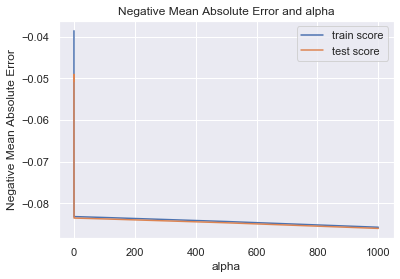

In [606]:
# plotting mean test and train scoes with alpha 

lasso_cv_results2['param_alpha'] = lasso_cv_results2['param_alpha'].astype('float64')

# plotting

plt.plot(lasso_cv_results2['param_alpha'], lasso_cv_results2['mean_train_score'])
plt.plot(lasso_cv_results2['param_alpha'], lasso_cv_results2['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [607]:
# get the best estimator for lambda

lasso_model_cv2.best_estimator_

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

- The best estimator comes out to be 0.0005 for Lasso 

In [608]:
# check the coefficient values with alpha = 0.0005

alpha = 0.0005

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 2.77827603e-03, -1.14692195e-02,  0.00000000e+00,  7.72286770e-04,
       -0.00000000e+00,  1.17081431e-02,  0.00000000e+00,  4.96516140e-03,
        4.22458281e-03,  2.44301923e-02,  2.19053074e-02,  6.28478881e-03,
        5.85253752e-04,  4.01734921e-03,  0.00000000e+00,  3.76781705e-03,
       -1.75480537e-02,  0.00000000e+00,  1.43272059e-03,  3.72832523e-06,
       -2.22712133e-02, -1.71936124e-02,  5.12571366e-03,  4.60394625e-03,
       -6.70187050e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.83794253e-02,  1.77285906e-02,  1.80477567e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.63487646e-04, -2.72178812e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  3.73891523e-03,  0.00000000e+00, -0.00000000e+00,
       -4.44245752e-03, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.58158374e-02, -0.00000000e+00,  3.51019442e-02, -4.41754153e-03,
       -0.00000000e+00, -

- Find the R squared value for both Test and Train data

In [609]:
#lets predict the R-squared value of train data
y_train_pred_lasso = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))

0.9727662208216137


In [610]:
#lets predict the R-squared value of test data
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9432588178435123


- Mean Squared Error for Train and Test data

In [611]:
# MSE for Train data
mean_squared_error(y_train, lasso.predict(X_train))

0.0044491904770031995

In [612]:
# MSE for Test data
mean_squared_error(y_test, lasso.predict(X_test))

0.00854008763004464

###### Find the top 10 most significant variables for Lasso

In [613]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.0028
1,MasVnrArea,-0.0115
2,BsmtFinSF2,0.0008
3,TotalBsmtSF,0.0117
4,2ndFlrSF,0.0050
5,LowQualFinSF,0.0042
6,GrLivArea,0.0244
7,GarageArea,0.0219
8,WoodDeckSF,0.0063
9,OpenPorchSF,0.0006


In [614]:
# Calculating absolute value of coefficient
lasso_df['absvalue'] = abs(lasso_df['Coefficient'])
lasso_df.head()

,Features,Coefficient,absvalue
0,LotArea,0.0028,0.0028
1,MasVnrArea,-0.0115,0.0115
2,BsmtFinSF2,0.0008,0.0008
3,TotalBsmtSF,0.0117,0.0117
4,2ndFlrSF,0.0050,0.0050


In [615]:
# Finding top 10 most significant variables for LASSO
lasso_df.sort_values(by=['Coefficient'], ascending=False, inplace=True)
lasso_df.head(n=10)

,Features,Coefficient,absvalue
66,BsmtCond_Gd,0.0377,0.0377
27,Neighborhood_Crawfor,0.0351,0.0351
64,BsmtQual_Gd,0.0281,0.0281
67,BsmtCond_TA,0.0274,0.0274
26,Neighborhood_ClearCr,0.0258,0.0258
6,GrLivArea,0.0244,0.0244
7,GarageArea,0.0219,0.0219
90,TotRmsAbvGrd_9,0.0219,0.0219
89,TotRmsAbvGrd_8,0.0213,0.0213
88,TotRmsAbvGrd_7,0.0194,0.0194


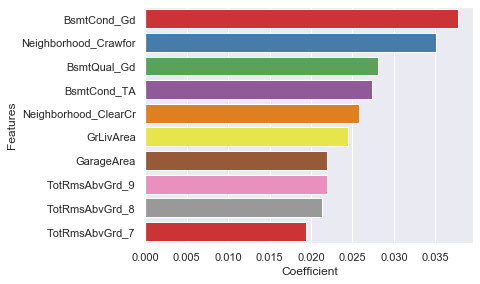

In [616]:
# bar plot to determine the variables that would affect pricing most using ridge regression
temp4_df = lasso_df.head(n=10)
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp4_df)
plt.show()

- These are the new most important features after the change as specified in Question 3